In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
import numpy as np

/home/seung/.venv/py369tf/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data, _ = make_blobs(n_samples=800, centers=7, cluster_std=0.20, random_state=0)

In [3]:
data.shape

(800, 2)

In [4]:
data[799,:]

array([-1.43481358,  8.08412389])

In [5]:
data[799,1]

8.084123892532626

Text(0, 0.5, 'Y')

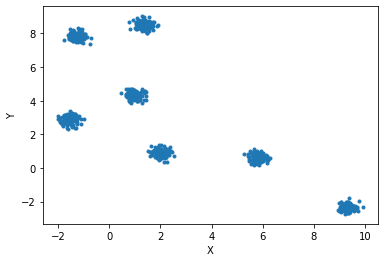

In [6]:
plt.plot(data[:, 0], data[:, 1], '.')
plt.xlabel('X')
plt.ylabel('Y')

In [7]:
%%time
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

CPU times: user 69.7 ms, sys: 0 ns, total: 69.7 ms
Wall time: 19.8 ms


KMeans(n_clusters=5)

아래 중 맞는 것 하나를 골라보세요.

In [8]:
kmeans = KMeans(n_clusters=1)
kmeans = KMeans(n_clusters=2)
kmeans = KMeans(n_clusters=3)
kmeans = KMeans(n_clusters=4)
kmeans = KMeans(n_clusters=5)
#kmeans = KMeans(n_clusters=6)
kmeans = KMeans(n_clusters=7)
#kmeans = KMeans(n_clusters=8)
#kmeans = KMeans(n_clusters=9)

In [9]:
arr1 = [] #빈 그릇 (list)
for i in range(1,12):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    print(i, '--------',  kmeans.inertia_)
    arr1.append(kmeans.inertia_)

1 -------- 21238.420478391763
2 -------- 7113.880913989476
3 -------- 3105.198618822145
4 -------- 1792.8898027472824
5 -------- 952.583407026894
6 -------- 473.86012834114035
7 -------- 60.8755939243628
8 -------- 57.10623431475834
9 -------- 54.589548426626024
10 -------- 50.88468696841379
11 -------- 48.25703058264386


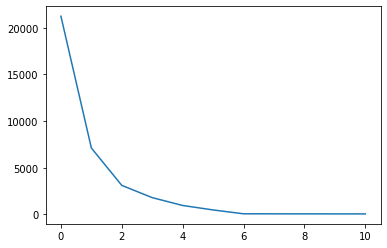

In [10]:
plt.plot(arr1)

위에서 k가 7에서 elbow가 있음에 착안 (index는 0부터)

In [16]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(data)
print(kmeans.inertia_)

60.875593924362796


In [17]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.02052062  0.88069251]
 [-1.25219327  7.82013601]
 [ 9.31480152 -2.33106587]
 [-1.55311755  2.89258542]
 [ 5.84082798  0.59194939]
 [ 0.96372862  4.31653186]
 [ 1.34680251  8.52053851]]


In [13]:
kmeans.inertia_

60.875593924362796

In [14]:
kmeans.labels_

array([3, 6, 4, 3, 0, 4, 1, 5, 6, 5, 3, 6, 3, 4, 1, 4, 3, 2, 6, 6, 2, 3,
       3, 0, 1, 5, 6, 3, 0, 4, 6, 6, 3, 5, 1, 3, 4, 0, 1, 1, 5, 6, 3, 4,
       0, 2, 4, 1, 5, 2, 0, 0, 4, 4, 3, 2, 1, 3, 2, 6, 6, 5, 3, 5, 5, 3,
       3, 5, 4, 1, 1, 1, 4, 6, 4, 4, 0, 0, 2, 1, 1, 1, 0, 3, 1, 6, 6, 5,
       4, 1, 4, 6, 5, 3, 1, 3, 4, 1, 3, 4, 1, 2, 6, 5, 4, 2, 3, 5, 4, 6,
       6, 1, 5, 3, 1, 4, 4, 5, 6, 3, 2, 0, 6, 0, 1, 5, 2, 6, 5, 1, 4, 6,
       5, 1, 0, 3, 2, 0, 4, 0, 0, 2, 0, 5, 6, 4, 6, 5, 0, 5, 2, 2, 6, 3,
       0, 1, 1, 5, 1, 0, 4, 5, 5, 0, 3, 6, 2, 0, 5, 3, 1, 2, 1, 6, 5, 6,
       3, 3, 0, 4, 2, 1, 1, 2, 0, 5, 2, 4, 5, 1, 5, 5, 5, 3, 2, 5, 0, 2,
       6, 4, 2, 4, 6, 3, 4, 6, 0, 5, 0, 3, 1, 3, 3, 2, 5, 1, 3, 1, 6, 1,
       4, 4, 0, 0, 0, 2, 0, 5, 6, 1, 2, 6, 1, 4, 4, 3, 3, 6, 5, 6, 2, 1,
       4, 6, 3, 3, 6, 1, 4, 1, 1, 0, 2, 6, 2, 2, 0, 6, 4, 0, 1, 1, 5, 6,
       0, 3, 3, 6, 3, 4, 2, 0, 2, 5, 2, 5, 0, 1, 1, 2, 2, 2, 4, 1, 6, 1,
       1, 1, 4, 4, 5, 2, 2, 2, 1, 4, 3, 1, 2, 0, 1,

Text(0, 0.5, 'Y')

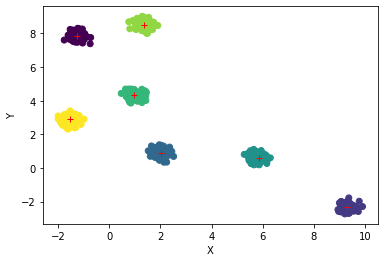

In [15]:
#plt.plot(x, y, '.')
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)
plt.plot(centroids[:, 0], centroids[:, 1], 'r+')
plt.xlabel('X')
plt.ylabel('Y')